# <center>Phân cụm các chuyến xe khách dựa trê giá vé và các đánh giá</center>

---

## 1. Load data

In [168]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

In [169]:
folder_path = "../../data/processed"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Đọc file csv
lst_df = []
for file in csv_files:
    df = pd.read_csv(file)
    lst_df.append(df)

# Nối các DataFrame lại với nhau
df = pd.concat(lst_df)
df = df.reset_index(drop=True)

In [170]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28656 entries, 0 to 28655
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company_name              28656 non-null  object 
 1   departure_time            28656 non-null  object 
 2   pickup_point              28656 non-null  object 
 3   arrival_time              28656 non-null  object 
 4   dropoff_point             28656 non-null  object 
 5   price_original            28656 non-null  int64  
 6   price_discounted          28656 non-null  int64  
 7   departure_date            28656 non-null  object 
 8   start_point               28656 non-null  object 
 9   destination               28656 non-null  object 
 10  rating_safety             28656 non-null  float64
 11  rating_info_accuracy      28656 non-null  float64
 12  rating_info_completeness  28656 non-null  float64
 13  rating_staff_attitude     28656 non-null  float64
 14  rating

,price_original,price_discounted,rating_safety,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
count,2.865600e+04,28656.000000,28656.000000,28656.000000,28656.000000,28656.00000,28656.000000,28656.000000,28656.000000,28656.000000,28656.000000,28656.000000,28656.000000
mean,3.325532e+05,131668.518007,4.586160,4.451898,4.511554,4.48772,4.438264,4.404484,4.612416,4.427429,2080.662584,22.430451,369.670191
std,1.583610e+05,172442.983853,0.361528,0.469673,0.422865,0.42896,0.462517,0.476747,0.466503,0.489651,3555.655236,13.417856,250.788042
min,0.000000e+00,0.000000,2.300000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,30.000000
25%,2.200000e+05,0.000000,4.500000,4.200000,4.300000,4.30000,4.200000,4.200000,4.600000,4.200000,111.000000,11.000000,150.000000
50%,3.000000e+05,0.000000,4.700000,4.600000,4.600000,4.60000,4.600000,4.500000,4.700000,4.600000,486.000000,24.000000,330.000000
75%,4.050000e+05,270000.000000,4.800000,4.800000,4.800000,4.80000,4.700000,4.700000,4.800000,4.800000,2367.000000,34.000000,515.000000
max,1.200000e+06,900000.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,17457.000000,242.000000,1500.000000


In [171]:
print(f"DataFrame shape: {df.shape}")
df.sample(10)

DataFrame shape: (28656, 21)


,company_name,departure_time,pickup_point,arrival_time,dropoff_point,price_original,price_discounted,departure_date,start_point,destination,...,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
4163,Long Vân Limousine,23:59:00,Văn phòng,06:59,Văn phòng,400000,0,2025-11-14,Sài Gòn,Đà Lạt - Lâm Đồng,...,4.4,4.5,4.5,4.4,4.4,4.8,4.5,7022,22,420
26532,Như Ý 78,18:00:00,Bến xe,06:15,Văn phòng,200000,0,2025-11-23,Sài Gòn,Phú Yên,...,4.5,4.6,4.5,4.5,4.4,4.3,4.5,147,24,735
10059,Vương Tấn Dũng,16:45:00,Bến xe,04:00,Văn phòng,380000,320000,2025-11-17,Sài Gòn,Gia Lai,...,4.8,4.8,4.8,4.8,4.8,4.9,4.8,386,34,675
15702,Điều Hòa,22:00:00,Bến xe,05:00,Văn phòng,400000,274000,2025-11-19,Sài Gòn,Đắk Lắk,...,4.6,4.7,4.6,4.6,4.6,4.8,4.7,278,24,420
23898,Khanh Phong,05:00:00,Văn phòng,11:10,Văn phòng,480000,400000,2025-11-22,Sài Gòn,Nha Trang - Khánh Hòa,...,4.7,4.7,4.7,4.7,4.7,4.8,4.7,17414,20,370
11993,Cửa Ông Limousine,09:00:00,Other,09:45,Văn phòng,130000,80000,2025-11-17,Đà Nẵng,Quảng Nam,...,4.1,4.3,4.3,4.2,4.1,4.3,4.1,525,34,45
3411,Nam Hải Limousine,08:00:00,Văn phòng,11:00,Văn phòng,200000,170000,2025-11-14,Sài Gòn,Bình Thuận,...,4.7,4.7,4.7,4.7,4.7,4.8,4.7,3648,34,180
17670,G8 SAPA OPEN TOUR,20:45:00,Other,08:45,Other,850000,750000,2025-11-19,Đà Nẵng,Hà Nội,...,4.6,4.6,4.6,4.6,4.6,4.6,4.6,2047,24,720
16734,Sapa Express,22:00:00,Văn phòng,04:00,Văn phòng,420000,400001,2025-11-19,Hà Nội,Sa Pa - Lào Cai,...,4.8,4.9,4.8,4.7,4.8,4.8,4.9,208,22,360
3894,Phương Nam,19:30:00,Văn phòng,04:22,Văn phòng,240000,0,2025-11-14,Sài Gòn,Nha Trang - Khánh Hòa,...,4.8,4.8,4.7,4.7,4.7,4.8,4.7,2482,40,532


In [172]:
df

,company_name,departure_time,pickup_point,arrival_time,dropoff_point,price_original,price_discounted,departure_date,start_point,destination,...,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
0,Hoàng Thuỷ,18:45:00,Bến xe,05:45,Bến xe,350000,300000,2025-11-12,Sài Gòn,Gia Lai,...,4.7,4.7,4.7,4.6,4.6,4.9,4.7,3485,34,660
1,Sinh Diên Hồng,17:30:00,Bến xe,04:15,Bến xe,370000,296000,2025-11-12,Sài Gòn,Gia Lai,...,4.7,4.8,4.8,4.6,4.6,4.9,4.6,237,34,645
2,Phong Phú,20:00:00,Văn phòng,07:45,Văn phòng,530000,399000,2025-11-12,Sài Gòn,Gia Lai,...,4.5,4.6,4.5,4.4,4.4,4.7,4.5,8677,24,705
3,Kính Diên Hồng,18:40:00,Bến xe,05:40,Bến xe,350000,0,2025-11-12,Sài Gòn,Gia Lai,...,4.6,4.7,4.6,4.5,4.5,4.5,4.6,1135,34,660
4,Đức Đạt,20:10:00,Bến xe,06:35,Bến xe,350000,300000,2025-11-12,Sài Gòn,Gia Lai,...,4.5,4.6,4.5,4.5,4.5,4.9,4.7,1027,34,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,Việt Lào,19:30:00,Văn phòng,05:45,Văn phòng,0,0,2025-11-23,Đà Nẵng,Nha Trang - Khánh Hòa,...,4.6,4.6,4.6,4.8,4.6,4.7,4.5,89,24,615
28652,Việt Lào,19:45:00,Văn phòng,05:45,Văn phòng,0,0,2025-11-23,Đà Nẵng,Nha Trang - Khánh Hòa,...,4.6,4.6,4.6,4.8,4.6,4.7,4.5,89,24,600
28653,Việt Lào,19:00:00,Bến xe,04:25,Other,0,0,2025-11-23,Đà Nẵng,Nha Trang - Khánh Hòa,...,4.6,4.6,4.6,4.8,4.6,4.7,4.5,89,24,565
28654,Việt Lào,18:30:00,Văn phòng,04:25,Other,0,0,2025-11-23,Đà Nẵng,Nha Trang - Khánh Hòa,...,4.6,4.6,4.6,4.8,4.6,4.7,4.5,89,24,595


---

## 2. Preparation Data

In [173]:
df['rating_overall'].value_counts()

rating_overall
4.8    4821
4.7    3829
4.6    3553
4.4    2434
4.5    2235
4.9    1699
3.8    1494
5.0    1411
4.0    1299
4.2    1228
4.3    1130
4.1    1021
3.7     325
3.6     286
3.1     242
3.2     221
3.5     212
3.9     205
3.4     185
3.3     160
2.8     158
2.7     155
2.9     112
3.0     109
2.0      35
2.5      31
2.3      24
1.0      16
2.2      14
2.6       7
0.0       5
Name: count, dtype: int64

In [174]:
df['reviewer_count'].value_counts()

reviewer_count
81      646
169     602
11      419
89      338
6       333
       ... 
296       1
1486      1
442       1
709       1
2554      1
Name: count, Length: 674, dtype: int64

---

In [175]:
df.head()

,company_name,departure_time,pickup_point,arrival_time,dropoff_point,price_original,price_discounted,departure_date,start_point,destination,...,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
0,Hoàng Thuỷ,18:45:00,Bến xe,05:45,Bến xe,350000,300000,2025-11-12,Sài Gòn,Gia Lai,...,4.7,4.7,4.7,4.6,4.6,4.9,4.7,3485,34,660
1,Sinh Diên Hồng,17:30:00,Bến xe,04:15,Bến xe,370000,296000,2025-11-12,Sài Gòn,Gia Lai,...,4.7,4.8,4.8,4.6,4.6,4.9,4.6,237,34,645
2,Phong Phú,20:00:00,Văn phòng,07:45,Văn phòng,530000,399000,2025-11-12,Sài Gòn,Gia Lai,...,4.5,4.6,4.5,4.4,4.4,4.7,4.5,8677,24,705
3,Kính Diên Hồng,18:40:00,Bến xe,05:40,Bến xe,350000,0,2025-11-12,Sài Gòn,Gia Lai,...,4.6,4.7,4.6,4.5,4.5,4.5,4.6,1135,34,660
4,Đức Đạt,20:10:00,Bến xe,06:35,Bến xe,350000,300000,2025-11-12,Sài Gòn,Gia Lai,...,4.5,4.6,4.5,4.5,4.5,4.9,4.7,1027,34,625


## 3. Feature Engineering

In [176]:
# 1.real_price 
df.drop(index=df.loc[df['price_original'] == 0, 'price_original'].index, inplace=True)
df.loc[df['price_discounted'] == 0, 'price_discounted'] = df['price_original']
df['real_price'] = df['price_discounted']

# 2. tỷ lệ giảm giá
df['discount_ratio'] = 1 - (df['price_discounted'] / df['price_original'])

# 3. price per minute
df['price_per_minute'] = df['real_price'] / df['duration_minutes']

# 4. tập hợp staff_attitude, service_quality, comfort
df['service_score'] = df[['rating_staff_attitude', 'rating_service_quality', 'rating_comfort']].mean(axis=1)

# 5. tập hợp safety, punctuality, info_accuracy
df['trust_score'] = df[['rating_safety', 'rating_punctuality', 'rating_info_accuracy']].mean(axis=1)

# 6. is_high_quality
import numpy as np

def wilson_lower_bound(p, n, z=1.96):
    """
    p: tỷ lệ rating (rating_overall / 5)
    n: reviewer_count
    z: 1.96 ~ 95% confidence
    """
    if n == 0:
        return 0

    denominator = 1 + z**2 / n
    centre = p + z*z/(2*n)
    margin = z * np.sqrt((p*(1-p) + z*z/(4*n)) / n)
    lower_bound = (centre - margin) / denominator

    return lower_bound

df['p'] = df['rating_overall'] / 5
df['wilson_score'] = df.apply(
    lambda row: wilson_lower_bound(row['p'], row['reviewer_count']), axis=1
)
threshold = df['wilson_score'].quantile(0.80)
df['is_high_quality'] = (df['wilson_score'] >= threshold).astype(int)


# 7. seat_type_category
def categorize_seat_type(n):
    if 4 <= n <= 12:
        return "limousine_small"
    elif 13 <= n <= 18:
        return "mini_bus"
    elif 19 <= n <= 26:
        return "limousine_large"
    elif 27 <= n <= 33:
        return "standard_seat"
    elif 34 <= n <= 40:
        return "sleeper"
    elif 41 <= n <= 46:
        return "sleeper_highend"
    elif n > 100:
        return "special_cabin"
    else:
        return "other"

df['seat_type_category'] = df['number_of_seat'].apply(categorize_seat_type)

# 8. price per seat
df['price_per_seat'] = df['real_price'] / df['number_of_seat']

---

## Normalize feature

In [177]:
# 1.df Loại bỏ 'special_cabin' trong seat_type_category
df = df[df['seat_type_category'] != 'special_cabin']

# 2. Chuẩn hóa giá: log-transform
df['log_price'] = np.log1p(df['price_discounted'])

# 3. Chuẩn hoá thời gian chuyến đi
df["duration_minutes_log"] = np.log1p(df["duration_minutes"])

C:\Users\WELCOM AN\AppData\Local\Temp\ipykernel_15676\2307808937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log1p(df['price_discounted'])
C:\Users\WELCOM AN\AppData\Local\Temp\ipykernel_15676\2307808937.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration_minutes_log"] = np.log1p(df["duration_minutes"])


---

### Scale

In [178]:
feature_num = [
    'log_price',
    'wilson_score',
    # 'price_per_seat',
    # 'price_per_minute',
    # 'duration_minutes_log'
]
feature_cat = ['seat_type_category']

In [179]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


def scaler_feature(df, feature_num, feature_cat):

    df = df.copy()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', RobustScaler(), feature_num),
            ('cat', OneHotEncoder(), feature_cat)
        ]
    )
    X_scaled = preprocessor.fit_transform(df)

    return X_scaled

In [180]:
df_cluster = df[feature_num + feature_cat]
df_cluster = df_cluster.drop_duplicates(keep='first')

In [181]:
# 2. Scale
X_scaled = scaler_feature(df, feature_num, feature_cat)

In [182]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def train_kmeans_model(X_scaled, min_k=2, max_k=5):
    
    result = []
    for k in range(min_k, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        result.append((k, score))
        print(f"K={k}, Silhouette Score={score:.4f}")

train_kmeans_model(X_scaled)

K=2, Silhouette Score=0.2711
K=3, Silhouette Score=0.3173
K=4, Silhouette Score=0.3671
K=5, Silhouette Score=0.3629


PCA variance explained: 0.7343


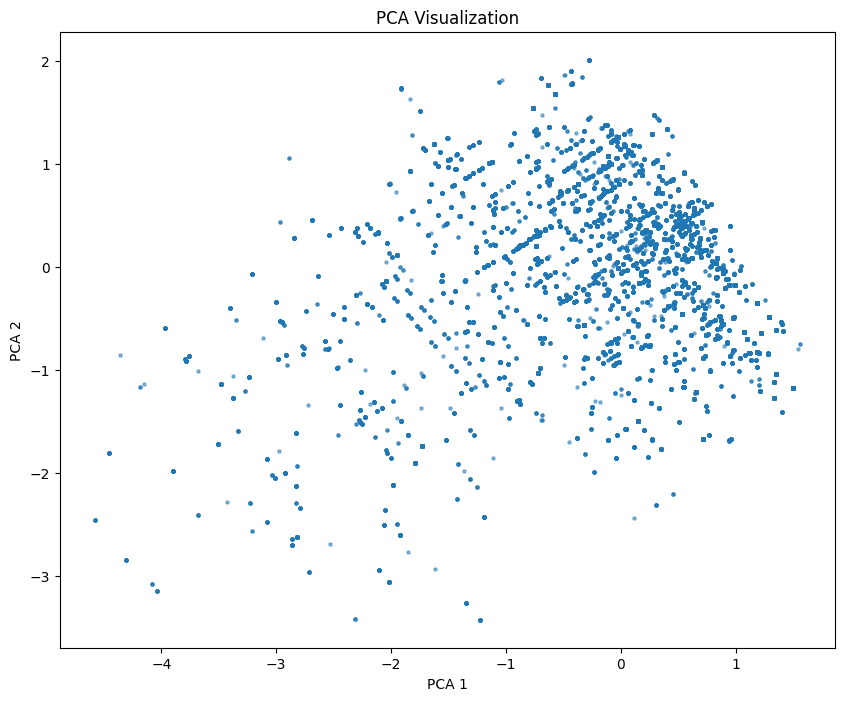

In [183]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def dimensionality_reduction(X_scaled, method='pca', n_components=2):
    """Giảm chiều dữ liệu"""
    
    if method == 'pca':
        reducer = PCA(n_components=n_components, random_state=42)
        X_reduced = reducer.fit_transform(X_scaled)
        variance_explained = reducer.explained_variance_ratio_.sum()
        print(f"PCA variance explained: {variance_explained:.4f}")
    
    elif method == 'tsne':
        reducer = TSNE(n_components=n_components, random_state=42, perplexity=30)
        X_reduced = reducer.fit_transform(X_scaled)
        print("t-SNE completed")
    
    # Visualize
    plt.figure(figsize=(10, 8))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=5, alpha=0.5)
    plt.xlabel(f'{method.upper()} 1')
    plt.ylabel(f'{method.upper()} 2')
    plt.title(f'{method.upper()} Visualization')
    plt.show()
    
    return X_reduced, reducer

# Thử cả PCA và t-SNE
X_pca, pca_reducer = dimensionality_reduction(X_scaled, method='pca')
# X_tsne, tsne_reducer = dimensionality_reduction(X_scaled, method='tsne')